In [15]:
import os
import random
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
import imagesize
import numpy as np

Подсчитаем общее количество изображений:

In [6]:
IMAGE_DIR = 'models_notebooks/images'
imgs = []
for root, _, filenames in os.walk(IMAGE_DIR):
    for file in filenames:
        imgs.append((os.path.join(root, file)))
len(imgs)

19794

Составим DataFrame, содержащую размеры изображений:

In [8]:
img_meta = {}
for file in imgs:
    img_meta[file] = imagesize.get(file)

In [9]:
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns')
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total number of images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total number of images in the dataset: 19794


,FileName,Size,Width,Height,Aspect Ratio
0,models_notebooks/images/чипсы/258953.jpg,"(200, 200)",200,200,1.00
1,models_notebooks/images/чипсы/573155.jpg,"(500, 500)",500,500,1.00
2,models_notebooks/images/чипсы/573159.jpg,"(500, 500)",500,500,1.00
3,models_notebooks/images/чипсы/1304633.jpg,"(917, 1280)",917,1280,0.72
4,models_notebooks/images/чипсы/41282.jpg,"(300, 300)",300,300,1.00


Взглянем на статистические данные размеров изображений:

In [14]:
img_meta_df.describe()

,Width,Height,Aspect Ratio
count,19794.000000,19794.000000,19794.000000
mean,727.047843,826.126958,0.956675
std,520.026838,591.742689,0.348764
min,69.000000,54.000000,0.160000
25%,300.000000,300.000000,1.000000
50%,540.000000,800.000000,1.000000
75%,1200.000000,1200.000000,1.000000
max,7610.000000,9664.000000,5.940000


(0.0, 2000.0)

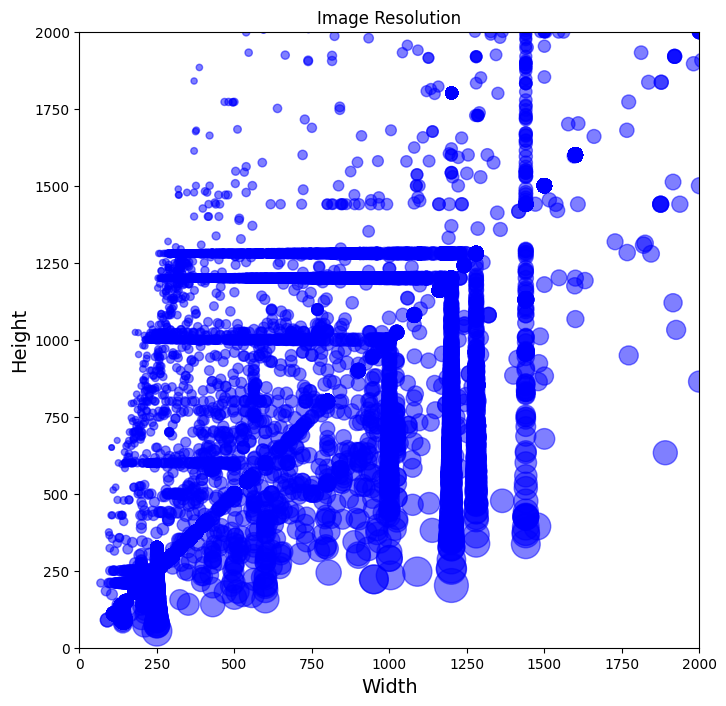

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.xlim(0, 2000)
plt.ylim(0, 2000)

In [37]:
img_meta_df.shape

(17852, 5)

Оставим только достатосно крупные изображения:

In [20]:
img_meta_df['Category'] = img_meta_df['FileName'].apply(lambda x: x.split('/')[-2])

In [36]:
img_meta_df['Category'].value_counts().describe()

count     40.000000
mean     494.850000
std       70.894848
min      384.000000
25%      435.500000
50%      498.000000
75%      529.500000
max      658.000000
Name: count, dtype: float64

Text(0, 0.5, '')

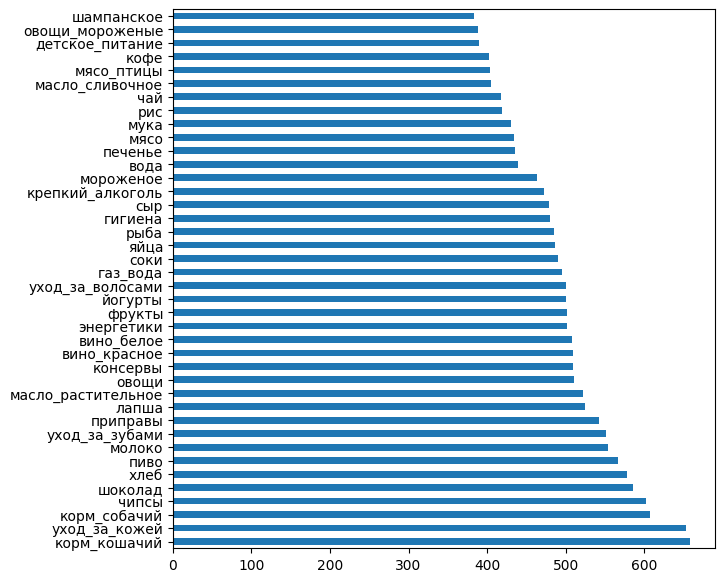

In [33]:
img_meta_df['Category'].value_counts().plot(kind='barh', figsize=(7,7))
plt.ylabel('')

Все изображения приводим к стандартному размеру 256х256.

In [139]:
for idx, row in img_filtered_sizes.iterrows():
    file_name = row['FileName']
    *_, dir, name = file_name.split('/')
    new_dir = os.path.join('/home/danil/Documents/курсовая/image_classification/categories/resized/', dir)
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    new_path = os.path.join(new_dir, name)
    if os.path.exists(new_path):
        continue
    try:
        image = Image.open(file_name)
        image = image.resize((256, 256)) 
    except ValueError:
        continue
    try:
        image.save(new_path)
    except OSError:
        image = image.convert('RGB')
        image.save(new_path)